## Лабораторная работа 1
### Графики абсолютной погрешности различных методов представления производной

In [5]:
import numpy as np                # импорт бибилиотеки numpy
import matplotlib.pyplot as plt   # импорт модуля matplotlib.pyplot
import scipy.integrate as integrate # импорт модуля численного интегрирования
import sympy as sp

Цель работы: изучить зависимость абсолютной погрешности различных методов представления производной от шага ($h_n = \frac{2}{2^n}$, $n=\overline{1,21}$) численного дифференцирования для функций: <br />
    0. $\\sin(x^2)$ <br />
    1. $\\cos(\\sin(x))$ <br />
    2. $\\exp(\\sin(\\cos(x)))$ <br />
    3. $\\ln(x+3)$ <br />
    4. $(x+3)^{0.5}$

Список методов: <br />
    0. $\frac{f(x+h)-f(x)}{h}$ <br />
    1. $\frac{f(x)-f(x-h)}{h}$ <br />
    2. $\frac{f(x+h)-f(x-h)}{2h}$ <br />
    3. $\frac{4}{3}\frac{f(x+h)-f(x-h)}{2h}-\frac{1}{3}\frac{f(x+2h)-f(x-2h)}{4h}$ <br />
    4. $\frac{3}{2}\frac{f(x+h)-f(x-h)}{2h}-\frac{3}{5}\frac{f(x+2h)-f(x-2h)}{4h} + \frac{1}{10}\frac{f(x+3h)-f(x-3h)}{6h}$
   

In [77]:
x = sp.symbols('x')
h = sp.Symbol('h')
f = sp.Function('f')

funcs = (
    sp.sin(x**2),
    sp.cos(sp.sin(x)),
    sp.exp(sp.sin(sp.cos(x))),
    sp.ln(x+3),
    (x+3)**0.5,
)

ranges = (
    np.linspace(0, np.pi, 100),
    np.linspace(0, np.pi, 100),
    np.linspace(0, np.pi, 100),
    np.linspace(1, np.pi, 100),
    np.linspace(0, np.pi, 100),
)

methods = (
    (f(x+h) - f(x))/h,
    (f(x) - f(x-h))/h,
    (f(x+h) - f(x-h))/(2*h),
    
        (4/3)*
    (f(x+h) - f(x-h))/(2*h) 
        - (1/3)*
    (f(x+2*h) - f(x-2*h))/(4*h),
    
        (3/2)*
    (f(x+h) - f(x-h))/(2*h)
        - (3/5) *
    (f(x+2*h) - f(x-2*h))/(4*h)
        + (1/10)*
    (f(x+3*h) - f(x-3*h))/(6*h)
)

hs = [2 / 2**n for n in range(1, 21 + 1)]

In [78]:
funcs_ders = []
for i in range(len(funcs)):
    der = sp.diff(funcs[i], x)
    print(f"Производная функции {i}: {der}")
    funcs_ders.append(sp.lambdify(x, der, "numpy"))

Производная функции 0: 2*x*cos(x**2)
Производная функции 1: -sin(sin(x))*cos(x)
Производная функции 2: -exp(sin(cos(x)))*sin(x)*cos(cos(x))
Производная функции 3: 1/(x + 3)
Производная функции 4: 0.5/(x + 3)**0.5


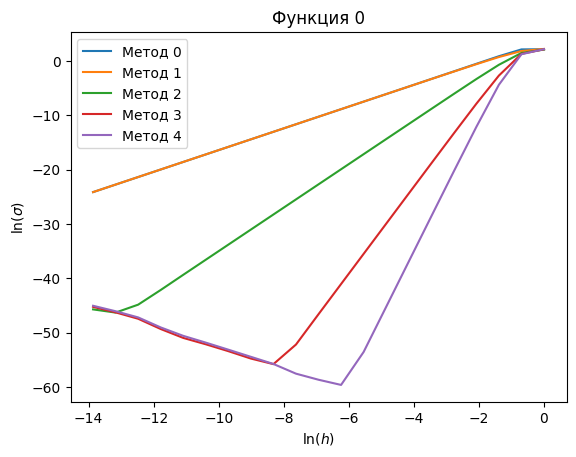

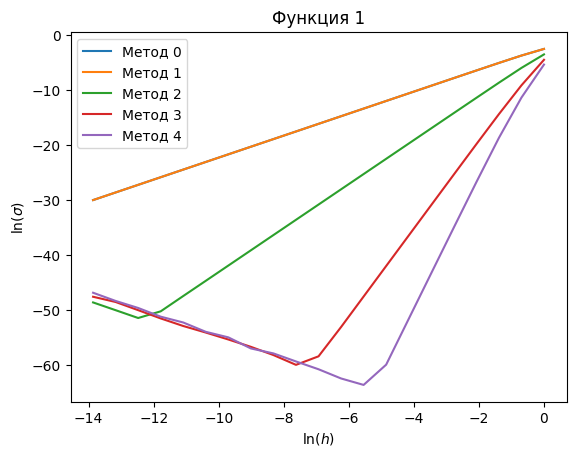

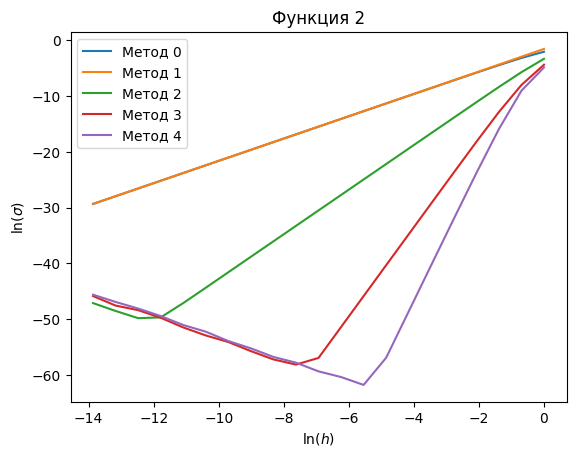

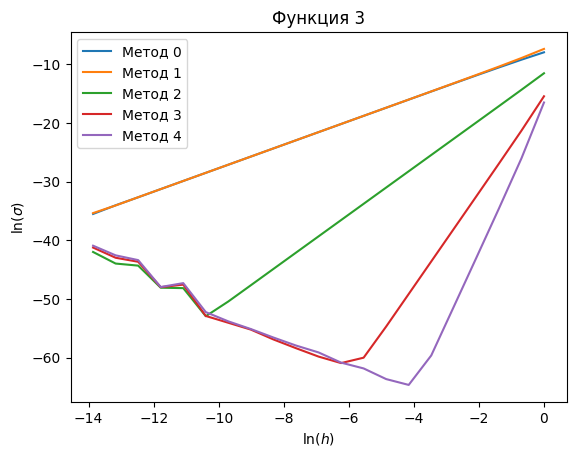

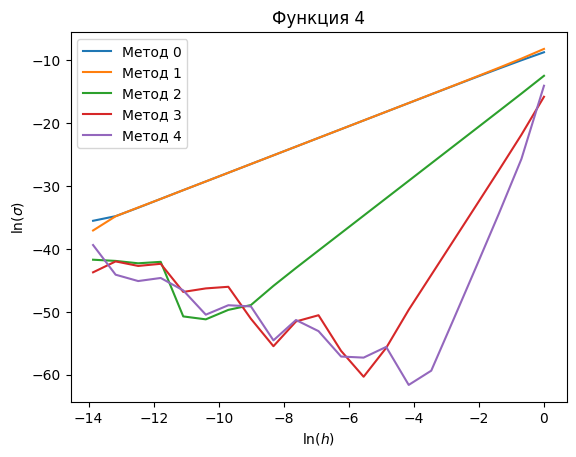

In [79]:
for i in range(len(funcs)):
    for method, j in zip(methods, range(len(methods))):
        repl_method = method.replace(f, lambda arg: funcs[i].subs(x, arg))
        error = []
        for h_val in hs:
            method = sp.lambdify(x, repl_method.subs(h, h_val), "numpy")
            error.append(sum((funcs_ders[i](ranges[i]) - method(ranges[i]))**2) / len(ranges[i]))
        plt.plot(np.log(hs), np.log(error), label=f"Метод {j}")

    plt.title(f"Функция {i}")
    plt.ylabel(r"$\ln(\sigma$)")
    plt.xlabel(r"$\ln(h)$")
    plt.legend()
    plt.show()